In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import calendar
import seaborn as sns

# Exercise 1

Evolution of Covid-19 during the last 12 months by 40 countries

In [5]:
heatmap_df = pd.read_csv("owid-covid-data.csv", usecols=['location','iso_code',
                                                         'date','new_cases_per_million'],parse_dates=['date'])
heatmap_df['Month'] = heatmap_df.date.dt.month_name()
heatmap_df.fillna(0,inplace=True)


In [6]:
heatmap_df = heatmap_df.groupby(['location','Month'],as_index=False)['new_cases_per_million'].sum()

In [7]:
#select 40 countries randomly
np.random.seed(1)
countries = np.random.choice(heatmap_df.location.unique(),size=40,replace=False)
countries

array(['Czechia', 'Guinea', 'Spain', 'China', 'Uruguay', 'Bahamas',
       'New Zealand', 'Iraq', 'Mauritius', 'United Kingdom', 'Timor',
       'Norway', 'Cameroon', 'Belgium', 'Marshall Islands', 'Grenada',
       'Cambodia', 'Egypt', 'Cape Verde', 'Slovenia', 'Djibouti',
       'Angola', 'Liberia', 'Vietnam', 'Eswatini', 'Mali', 'Sierra Leone',
       'Ireland', 'Equatorial Guinea', 'Palestine', 'Greece', 'Namibia',
       'Fiji', 'Italy', 'Venezuela', 'Barbados', "Cote d'Ivoire",
       'Bhutan', 'Suriname', 'Zambia'], dtype=object)

In [8]:
heatmap_df = heatmap_df[heatmap_df.location.isin(countries)]

In [9]:
heatmap_df= heatmap_df.pivot(index='location', columns='Month', values='new_cases_per_million')
heatmap_df.fillna(0, inplace=True)

In [10]:
monthes = ['January', 'February', 'March','April','May', 'June', 'July', 'August', 
            'September', 'October', 'November','December']
heatmap_df = heatmap_df[monthes]

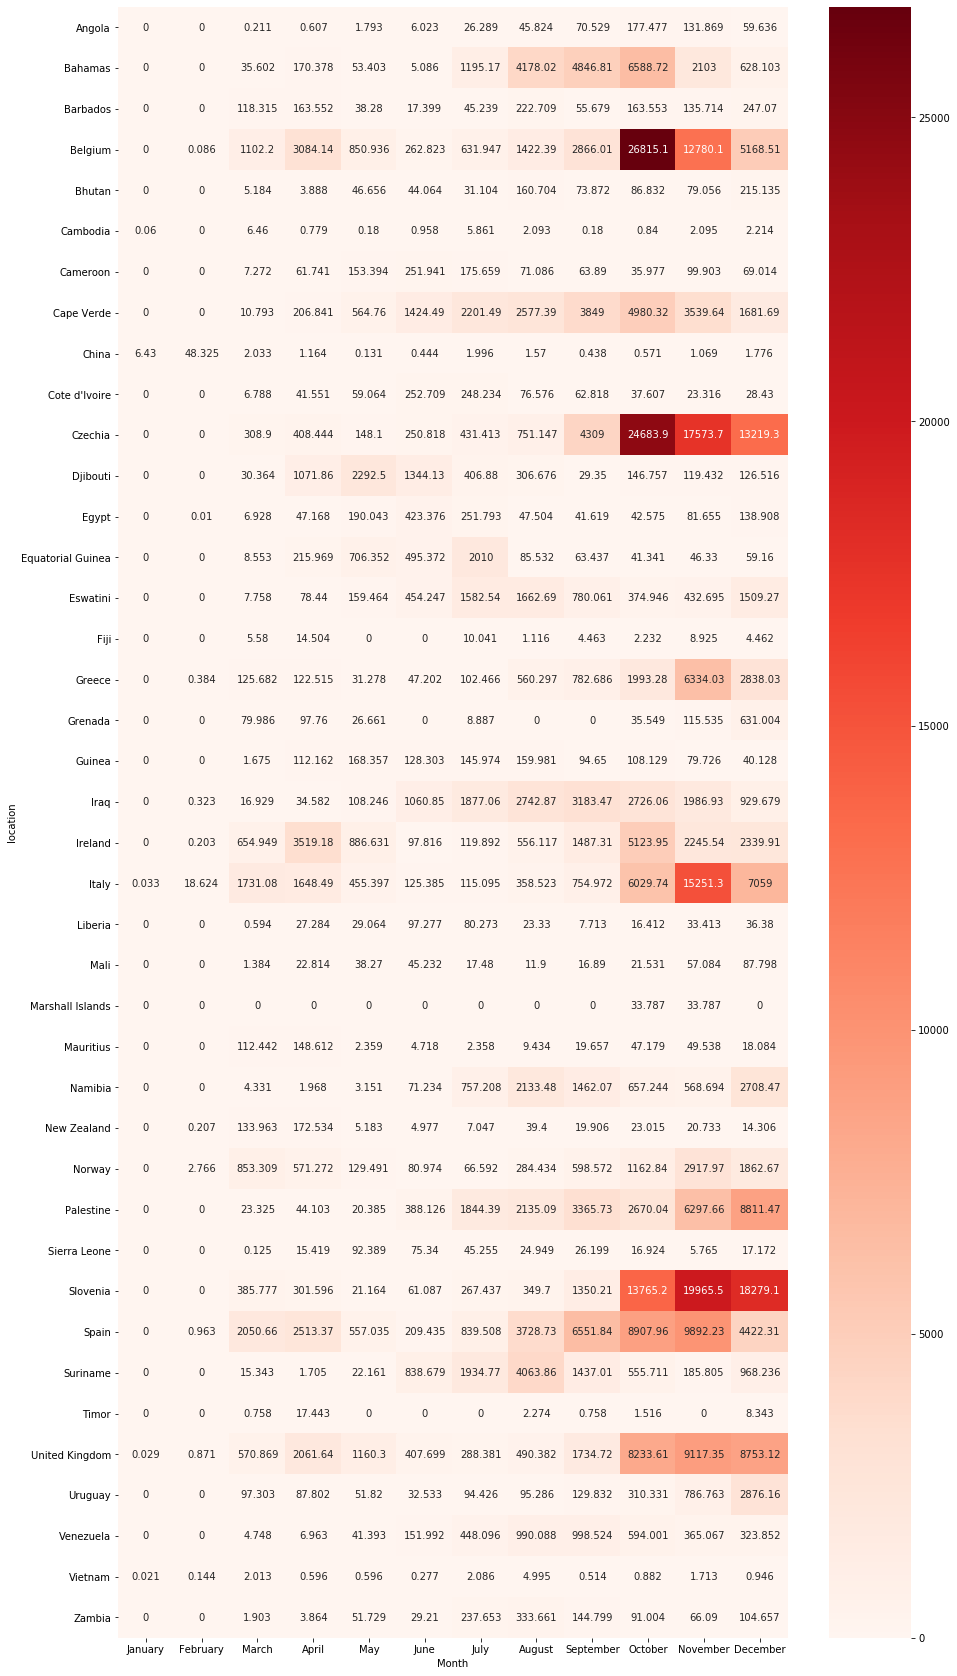

In [11]:
plt.figure(figsize=(15,30))
sns.heatmap(heatmap_df, annot=True, fmt="g", cmap="Reds")
plt.show()

# Exercise 2

In [12]:
scatter_df = pd.read_csv("owid-covid-data.csv", usecols=['continent', 'location',"total_cases_per_million",
        "total_deaths_per_million",'life_expectancy'])
scatter_df = scatter_df.groupby(["continent","location"],as_index=False)[["total_cases_per_million",
                                                        "total_deaths_per_million",'life_expectancy']].max()

In [13]:
#select 40 countries randomly
np.random.seed(1)
countries = np.random.choice(scatter_df.location.unique(),size=40,replace=False)
countries

array(['Mali', 'Indonesia', 'Estonia', 'Italy', 'Nepal', 'Cuba',
       'Mozambique', 'Andorra', 'Vietnam', 'Uzbekistan', 'Lithuania',
       'Equatorial Guinea', 'Kuwait', 'Haiti', 'Norway', 'Iran',
       'Ireland', 'Sao Tome and Principe', 'Burkina Faso', 'Sudan',
       'Uganda', 'Timor', 'Colombia', 'Bahamas', 'Madagascar', 'Zimbabwe',
       'Congo', 'Bulgaria', 'Australia', 'Azerbaijan', 'Djibouti',
       'Bosnia and Herzegovina', 'Uruguay', 'Ethiopia', 'Maldives',
       'Sri Lanka', 'Finland', 'Palestine', 'Bhutan', 'Nicaragua'],
      dtype=object)

In [14]:
scatter_df = scatter_df[scatter_df.location.isin(countries)]

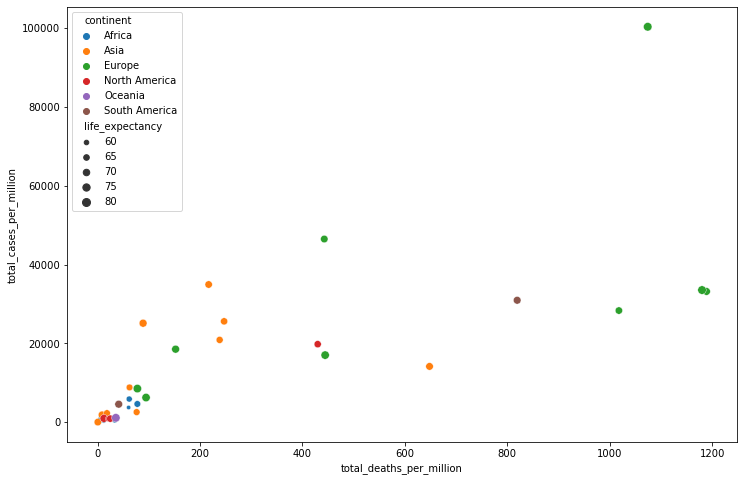

In [15]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='total_deaths_per_million',y='total_cases_per_million',data=scatter_df, hue='continent',
               size ='life_expectancy')
plt.show()

# Exercise 3

Compare the percentage of agriculture length from the actual area of the country between 1995 and 2015

In [27]:
agric_data = pd.read_csv("hw_pr_agr.csv")

In [28]:
agric_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,Agricultural land (% of land area),AG.LND.AGRI.ZS,NaN,11.111111,11.111111,11.111111,11.111111,11.111111,...,11.111111,11.111111,11.111111,11.111111,11.111111,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Agricultural land (% of land area),AG.LND.AGRI.ZS,NaN,57.745918,57.837821,57.914407,58.010906,58.013969,...,58.067580,58.067580,58.067580,58.067580,58.067580,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,Agricultural land (% of land area),AG.LND.AGRI.ZS,NaN,45.857063,45.881126,45.897169,45.921232,45.937274,...,47.316917,47.477340,47.477340,47.477340,47.477340,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,Agricultural land (% of land area),AG.LND.AGRI.ZS,NaN,44.963504,44.963504,45.000000,44.890511,45.145985,...,43.843067,43.332119,42.857301,42.857666,43.127735,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,Agricultural land (% of land area),AG.LND.AGRI.ZS,NaN,55.319149,55.319149,55.319149,55.319149,55.319149,...,39.914894,40.021275,40.021275,40.021275,39.957448,NaN,NaN,NaN,NaN,NaN


In [29]:
agric_data = agric_data[['Country Name','Country Code', '1995','2015']]

In [30]:
countries = [
    'JPN','SWE','FRA','GEO','RUS','USA','DEU','ITA',
    'CAN','CHN','PAK','FIN','NOR','TUR','AZE'
]

In [31]:
agric_data.set_index('Country Code',  inplace = True)
agric_data = agric_data.loc[countries]
agric_data.reset_index(inplace=True)

In [32]:
agric_data.head()

,Country Code,Country Name,1995,2015
0,JPN,Japan,14.928689,12.332675
1,SWE,Sweden,7.961690,7.463112
2,FRA,France,55.062218,52.463763
3,GEO,Georgia,43.862426,34.797814
4,RUS,Russian Federation,13.212540,13.294470


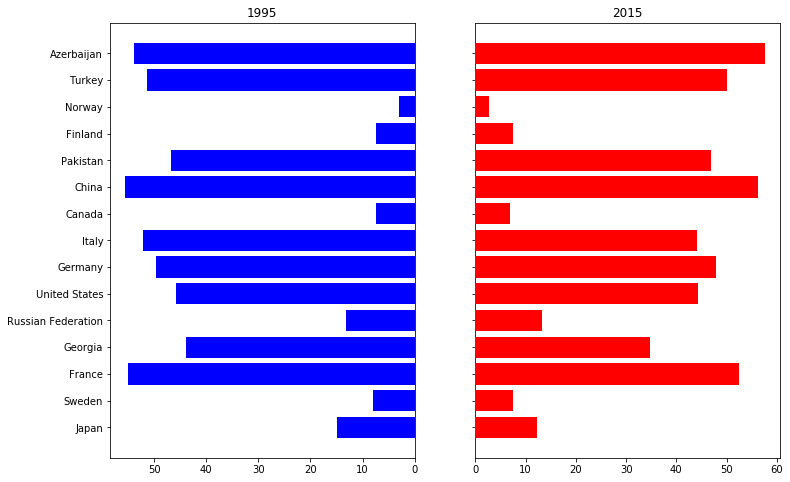

In [33]:
y = np.arange(15)
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(12,8))
axes[0].barh(y,agric_data['1995'], align='center', color='blue', zorder=10)
axes[0].set(title='1995')
axes[1].barh(y,agric_data['2015'], align='center', color='red', zorder=10)
axes[1].set(title='2015')

axes[0].invert_xaxis()
axes[0].set(yticks=y, yticklabels=agric_data["Country Name"])
plt.show()

# Exercise 4

The global tempreature anomalies

In [16]:
temp_df = pd.read_csv("global_temp.csv", header=4, names = ['Year','Temperature'])

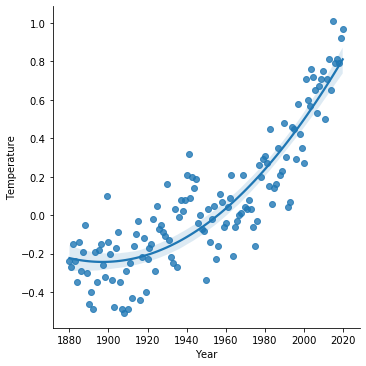

In [17]:
sns.lmplot(x="Year", y="Temperature", data=temp_df, order=2)
plt.show()